In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [47]:
# Step 2: Load CSV Dataset

# Load dataset from CSV file
df = pd.read_csv("/content/Iris.csv")


if 'Id' in df.columns:
    df = df.drop(columns=['Id'])


df = df.rename(columns={'Species': 'target'})

print("First 5 rows of dataset:")
print(df.head())

First 5 rows of dataset:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm       target
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


In [37]:
# Step 3: Separate Features & Target
X = df.iloc[:, :2].values   # first two features
y_str = df['target'].values # Keep original string labels for reference if needed

# Encode target labels to numerical values for model training and plotting
le = LabelEncoder()
y = le.fit_transform(y_str)

In [38]:
# Step 4: Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [39]:
# Step 5: Feature Scaling

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
# Step 6: Train KNN Model

k = 3   # Change this value to experiment
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [41]:
# Step 7: Predictions

y_pred = knn.predict(X_test)


Accuracy: 0.7777777777777778


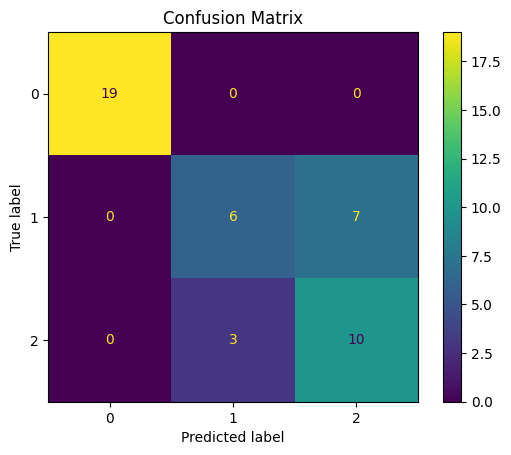

In [42]:
# Step 8: Evaluation

accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

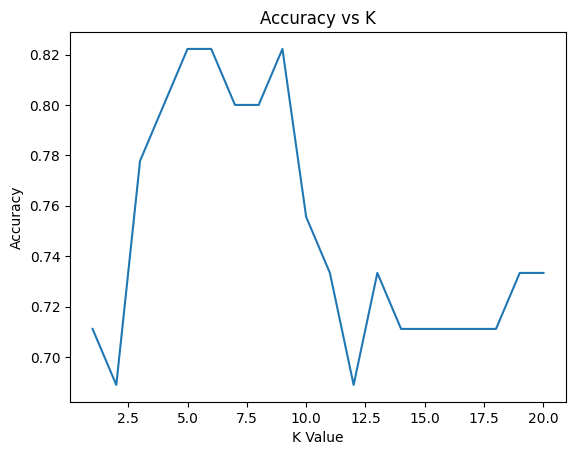

In [43]:
# Step 9: Accuracy vs K Graph

k_values = range(1, 21)
accuracies = []

for k_val in k_values:
    model = KNeighborsClassifier(n_neighbors=k_val)
    model.fit(X_train, y_train)
    y_pred_k = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred_k))

plt.figure()
plt.plot(k_values, accuracies)
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K")
plt.show()

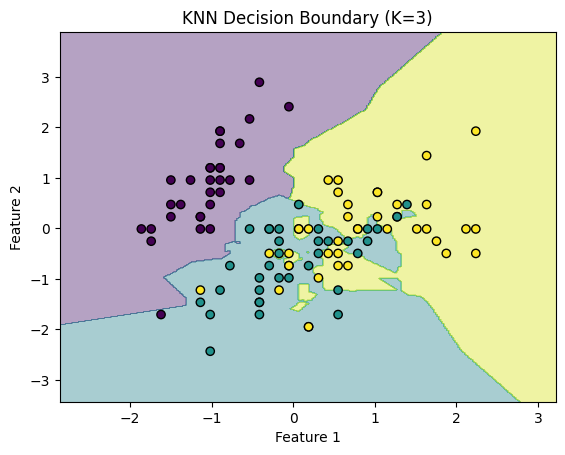

In [45]:
# Step 10: Decision Boundary

if X_train.shape[1] == 2: # Use X_train for shape check as it's the scaled features
    h = 0.02
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict using the trained knn model. The input to predict must match the training features.
    Z_str = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z_str.reshape(xx.shape) # Z_str is already numerical labels (0, 1, 2)

    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k')
    plt.title(f"KNN Decision Boundary (K={k})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()
else:
    print("\nDecision boundary can only be plotted for 2 features.")